<h1>AIPD PROJECT</h1>
<h3>ASSIGNMENT 1</h3>

**Members:**

**Aarya Laxman Gaikwad(EN23107025)**

**Srushti Amar Bhosale(EN23107008)**

**Shreni Navnath Bandgar(EN23107003)**

**Shalaka Bondre(EN23107009)**

**Class:-TY-AIDS(A)**



In [134]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

**PROBLEM STATEMENT:** Develop a machine learning model to predict the risk of suicide attempts in postnatal mothers based on their age and reported postnatal symptoms. The model will help healthcare professionals identify high-risk individuals early.

In [7]:
df=pd.read_csv("post natal data.csv")

In [9]:
df

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [11]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [15]:
df.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [19]:
df.isnull().any()

Timestamp                                    False
Age                                          False
Feeling sad or Tearful                       False
Irritable towards baby & partner              True
Trouble sleeping at night                    False
Problems concentrating or making decision     True
Overeating or loss of appetite               False
Feeling anxious                              False
Feeling of guilt                              True
Problems of bonding with baby                False
Suicide attempt                              False
dtype: bool

In [29]:
df.fillna

<bound method NDFrame.fillna of             Timestamp    Age Feeling sad or Tearful  \
0     6/14/2022 20:02  35-40                    Yes   
1     6/14/2022 20:03  40-45                    Yes   
2     6/14/2022 20:04  35-40                    Yes   
3     6/14/2022 20:05  35-40                    Yes   
4     6/14/2022 20:06  40-45                    Yes   
...               ...    ...                    ...   
1498   6/15/2022 0:35  30-35                    Yes   
1499   6/15/2022 0:35  25-30              Sometimes   
1500   6/15/2022 0:35  25-30                     No   
1501   6/15/2022 0:36  25-30                     No   
1502   6/15/2022 0:36  45-50              Sometimes   

     Irritable towards baby & partner Trouble sleeping at night  \
0                                 Yes   Two or more days a week   
1                                  No                        No   
2                                  No                       Yes   
3                                 Yes  

In [33]:
df.astype

<bound method NDFrame.astype of             Timestamp    Age Feeling sad or Tearful  \
0     6/14/2022 20:02  35-40                    Yes   
1     6/14/2022 20:03  40-45                    Yes   
2     6/14/2022 20:04  35-40                    Yes   
3     6/14/2022 20:05  35-40                    Yes   
4     6/14/2022 20:06  40-45                    Yes   
...               ...    ...                    ...   
1498   6/15/2022 0:35  30-35                    Yes   
1499   6/15/2022 0:35  25-30              Sometimes   
1500   6/15/2022 0:35  25-30                     No   
1501   6/15/2022 0:36  25-30                     No   
1502   6/15/2022 0:36  45-50              Sometimes   

     Irritable towards baby & partner Trouble sleeping at night  \
0                                 Yes   Two or more days a week   
1                                  No                        No   
2                                  No                       Yes   
3                                 Yes  

In [35]:
df.backfill()

/tmp/ipykernel_5849/2806377195.py:1: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df.backfill()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [47]:
if "Timestamp" in df.columns:
    df.drop("Timestamp", axis=1, inplace=True)

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [51]:
target_column = "Suicide attempt"   #
X = df.drop(target_column, axis=1)
y = df[target_column]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<H1>Train Models</H1>








**1) Random Forest**

In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

**2) Decision Tree**

In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

**3) Logistic Regression**

In [81]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

**4) Evaluation **

In [83]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
    print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

**5) Evaluate All Models**



In [91]:
evaluate_model("Random Forest", y_test, rf_pred)


===== Random Forest =====
Accuracy: 0.9900332225913622
Precision (Weighted): 0.9903479629305822
Recall (Weighted): 0.9900332225913622
F1 Score (Weighted): 0.9900771181861965

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       142
           1       1.00      0.99      0.99        67
           2       0.97      1.00      0.98        92

    accuracy                           0.99       301
   macro avg       0.99      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301

Confusion Matrix:
 [[140   0   2]
 [  0  66   1]
 [  0   0  92]]


In [93]:
evaluate_model("Decision Tree", y_test, dt_pred)


===== Decision Tree =====
Accuracy: 0.9700996677740864
Precision (Weighted): 0.9706626508769671
Recall (Weighted): 0.9700996677740864
F1 Score (Weighted): 0.9700671020482176

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       142
           1       0.97      0.96      0.96        67
           2       0.95      1.00      0.97        92

    accuracy                           0.97       301
   macro avg       0.97      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301

Confusion Matrix:
 [[136   2   4]
 [  2  64   1]
 [  0   0  92]]


In [95]:
evaluate_model("Logistic Regression", y_test, lr_pred)


===== Logistic Regression =====
Accuracy: 0.5913621262458472
Precision (Weighted): 0.5865481755777691
Recall (Weighted): 0.5913621262458472
F1 Score (Weighted): 0.5871540963220575

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       142
           1       0.51      0.40      0.45        67
           2       0.54      0.57      0.55        92

    accuracy                           0.59       301
   macro avg       0.57      0.56      0.56       301
weighted avg       0.59      0.59      0.59       301

Confusion Matrix:
 [[99 16 27]
 [22 27 18]
 [30 10 52]]


In [149]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)


Random Forest Feature Importance:
                                     Feature  Importance
3                  Trouble sleeping at night    0.132457
2           Irritable towards baby & partner    0.128746
1                     Feeling sad or Tearful    0.127894
7                           Feeling of guilt    0.118750
5             Overeating or loss of appetite    0.115738
4  Problems concentrating or making decision    0.113856
8              Problems of bonding with baby    0.111693
0                                        Age    0.093416
6                            Feeling anxious    0.057450


**visualization**

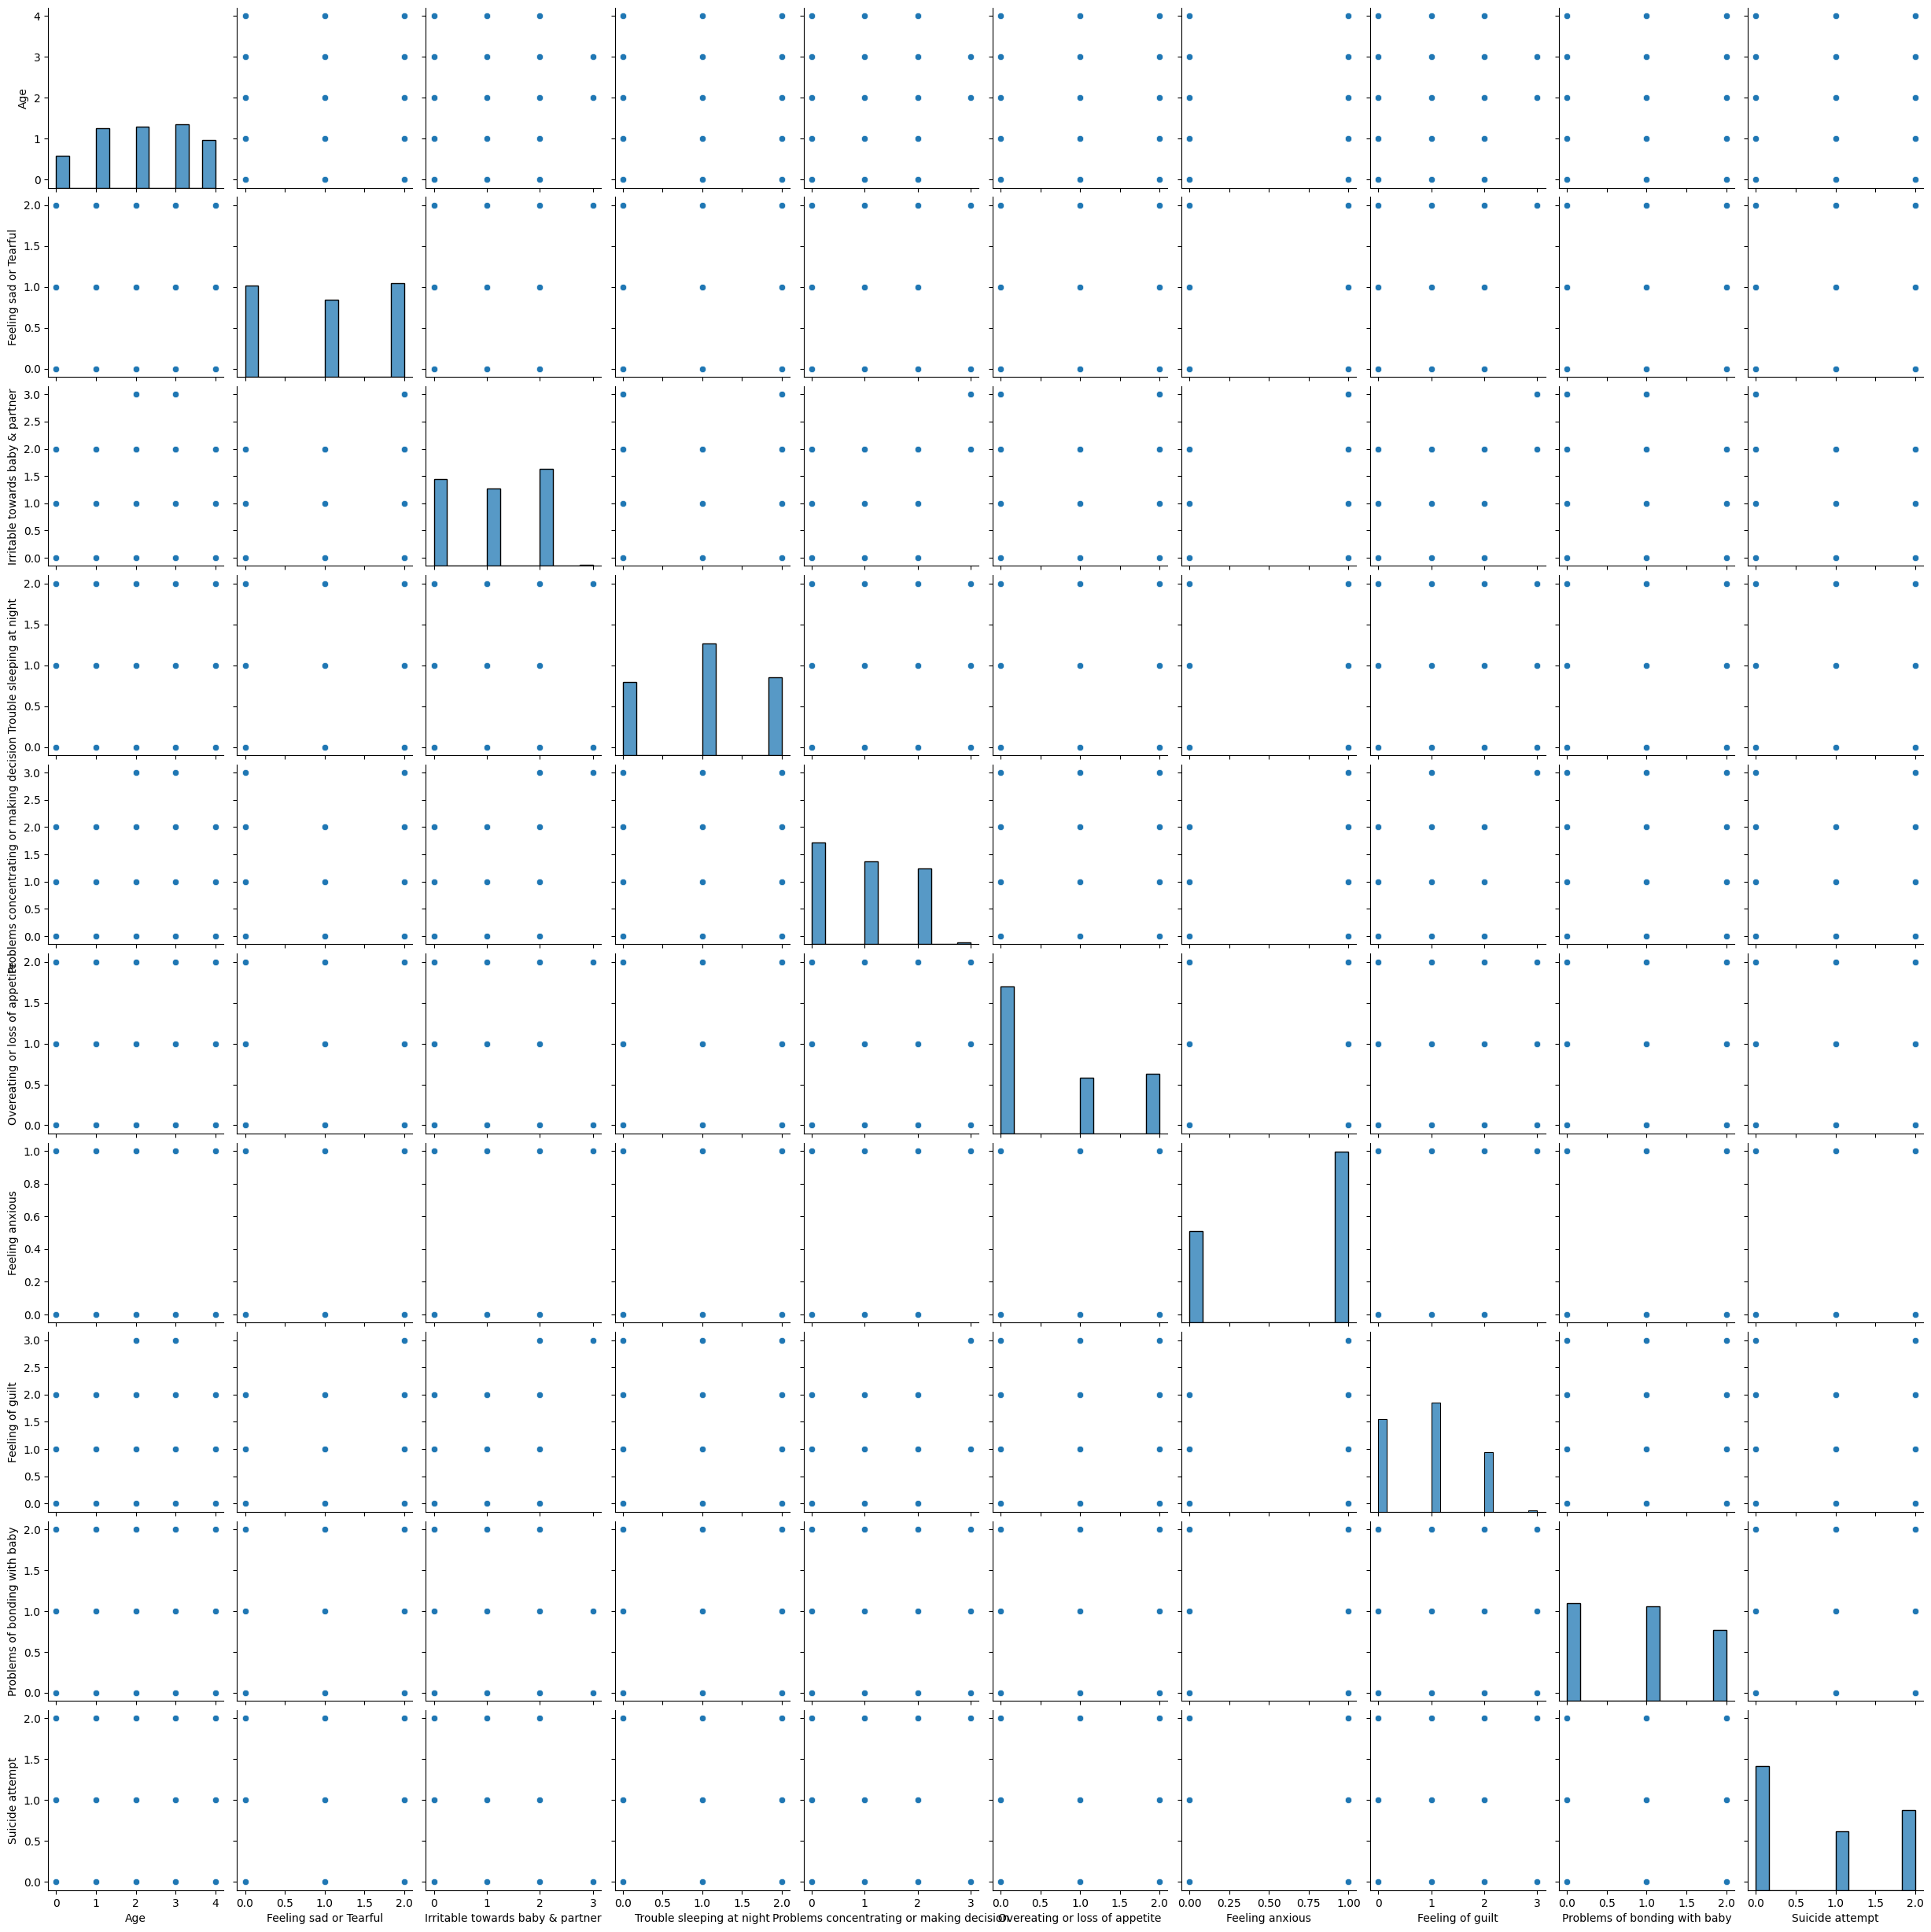

In [117]:
sns.pairplot(df)

<Axes: ylabel='Count'>

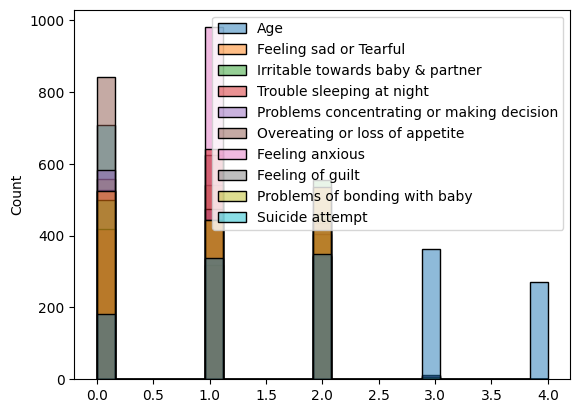

In [119]:
sns.histplot(df)

<Axes: >

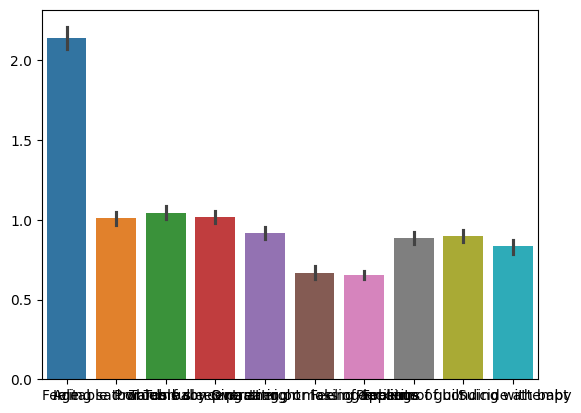

In [121]:
sns.barplot(df)

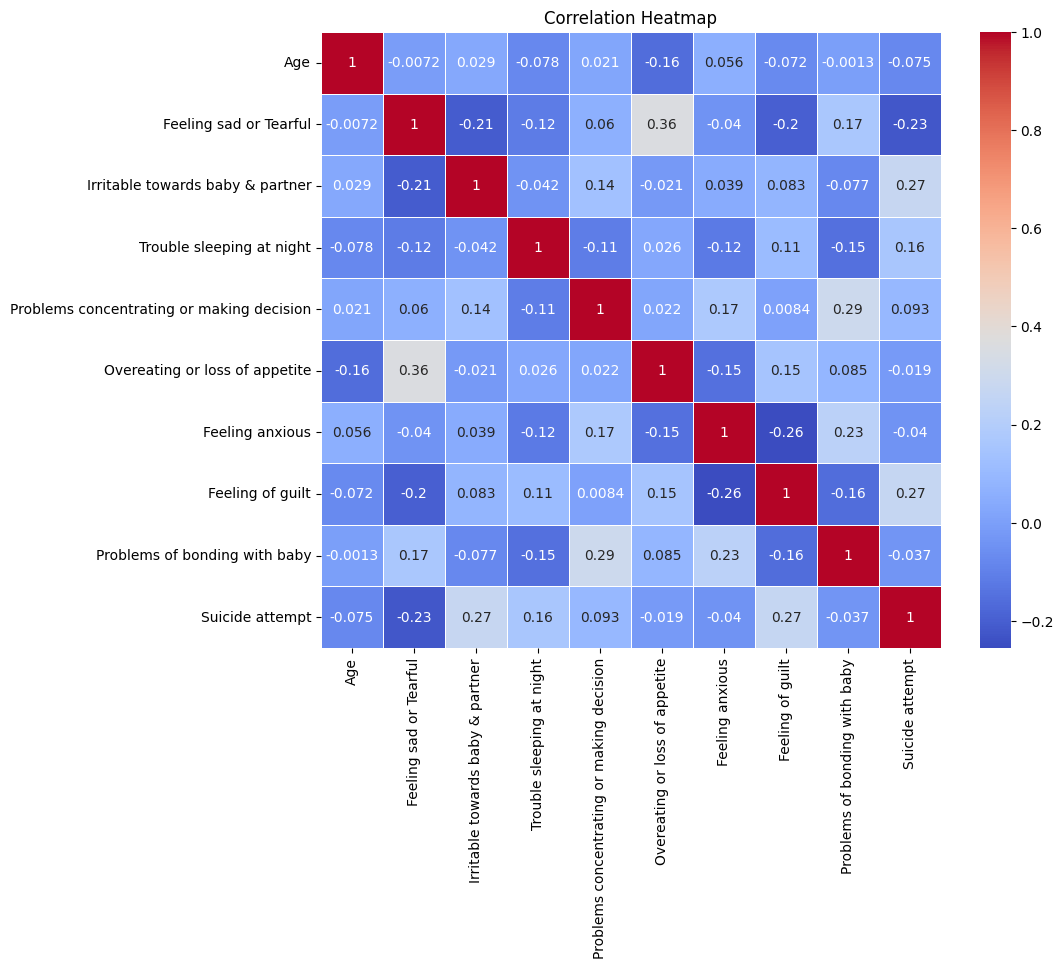

In [138]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            annot=True,       # show numbers
            cmap="coolwarm",  # color style
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

/home/admin1/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 98.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/admin1/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 99.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/admin1/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/admin1/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 99.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

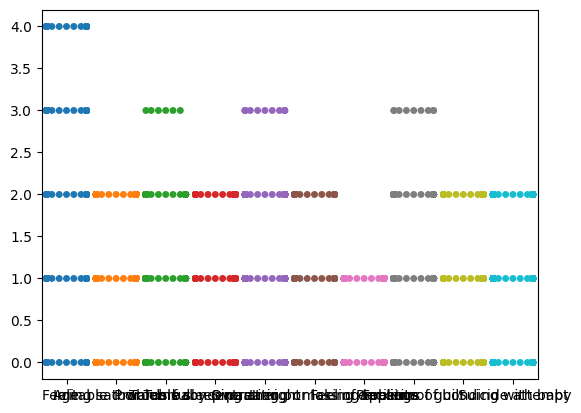

In [123]:
sns.swarmplot(df)

<Axes: >

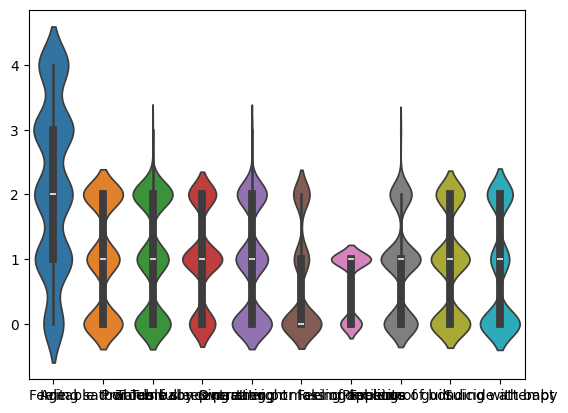

In [124]:
sns.violinplot(df)

<Axes: >

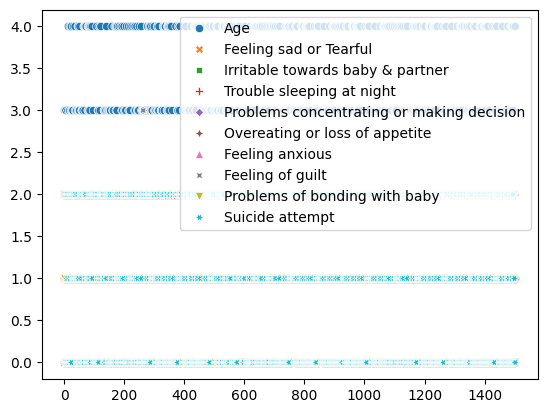

In [125]:
sns.scatterplot(df)

<Axes: >

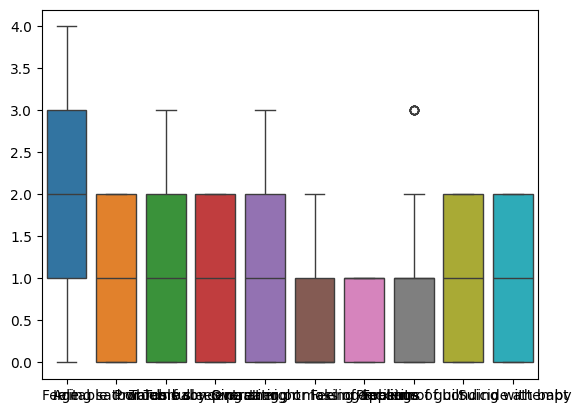

In [126]:
sns.boxplot(df)

<Axes: xlabel='Age', ylabel='Density'>

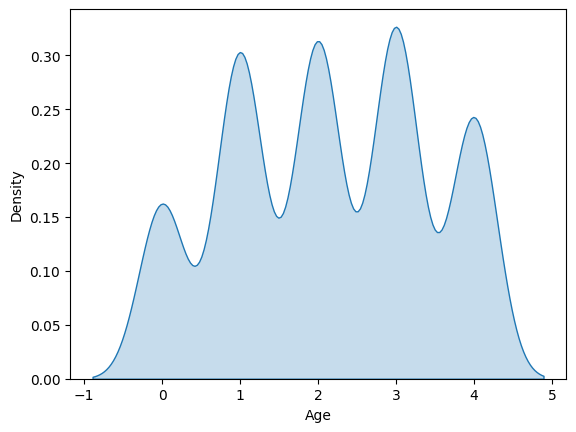

In [127]:
sns.kdeplot(data=df["Age"], fill=True)